<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
!pip3 install statsmodels -U

    100% |████████████████████████████████| 7.4MB 4.9MB/s 
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


In [0]:
!pip3 install datetools -U

  Stored in directory: /root/.cache/pip/wheels/fd/8b/bf/cfd6f9f3f4e72f9b9a94aa9ecc3f96e5f3ae3590c67ca4fb58
Successfully built datetools


In [0]:
# seaborn
!pip3 install seaborn -U

    100% |████████████████████████████████| 215kB 22.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [0]:
import statsmodels.api as sm
from scipy import stats

In [75]:
##### Your Code Here #####
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
print(df.shape)
df.sample(8)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
961,962,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,7,1977,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,424.0,TA,Gd,CBlock,Gd,Gd,No,ALQ,896,Unf,0,434,1330,GasA,TA,Y,SBrkr,1542,1330,0,2872,1,0,2,1,4,1,TA,11,Typ,1,TA,Attchd,1977.0,Fin,2,619,TA,TA,Y,550,282,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
1032,1033,60,RL,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1993,1993,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,1012,Unf,0,326,1338,GasA,Ex,Y,SBrkr,1352,1168,0,2520,1,0,2,1,5,1,Gd,10,Typ,1,TA,Attchd,1993.0,RFn,3,796,TA,TA,Y,209,55,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,310000
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,132.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1117,1117,GasA,Ex,Y,SBrkr,1132,1320,0,2452,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,Fin,3,691,TA,TA,Y,113,32,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000
550,551,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,559,Unf,0,510,1069,GasA,TA,Y,SBrkr,1069,0,0,1069,0,0,2,0,2,1,TA,4,Typ,0,NaN,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,55,0,0,200,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,140000
1029,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,7,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,281.0,TA,TA,CBlock,TA,TA,No,BLQ,317,Unf,0,355,672,GasA,Gd,Y,SBrkr,672,546,0,1218,0,1,1,1,3,1,TA,7,Typ,0,NaN,Detchd,1972.0,Unf,1,264,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,0,333,913,GasA,TA,Y,FuseA,1048,510,0,1558,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1109,1110,20,RL,107.0,11362,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,MetalSd,MetalSd,Stone,42.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1039,Unf,0,797,1836,GasA,Ex,Y,SBrkr,1836,0,0,1836,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3,862,TA,TA,Y,125,185,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,280000
324,325,80,RL,96.0,11275,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,PosN,Norm,1Fam,SLvl,7,7,1967,2007,Mansard,WdShake,Wd Sdng,Wd Sdng,BrkFace,300.0,Gd,Gd,CBlock,Gd,TA,No,Unf,0,Unf,0,710,710,GasA,Ex,Y,SBrkr,1898,1080,0,2978,0,0,2,1,5,1,Gd,11,Typ,1,Gd,BuiltIn,1961.0,Fin,2,564,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,242000


In [76]:
# drop na cols
df = df.drop(df.columns[df.isna().any()].tolist(), axis=1)
df.shape

(1460, 62)

In [0]:
X = df['GrLivArea']
y = df['SalePrice']

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


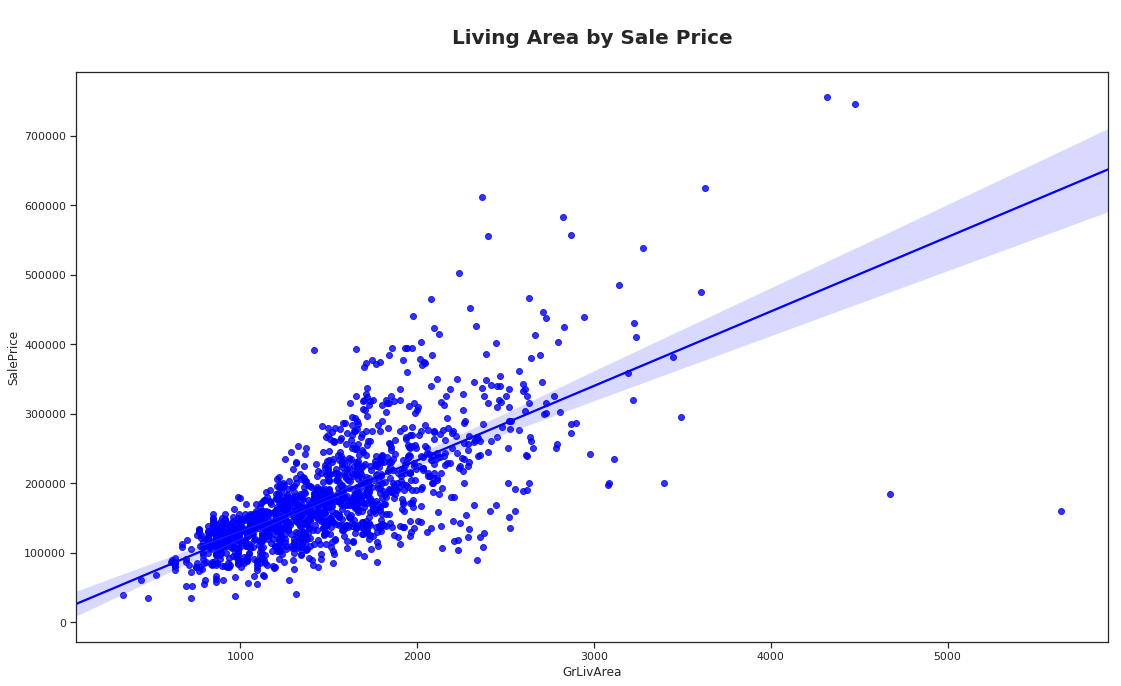

In [59]:
# seaborn regplot also shows confidence int
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig = sns.regplot(X, y, color='blue').set_title('\nLiving Area by Sale Price\n', fontweight='bold', fontsize=20)

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

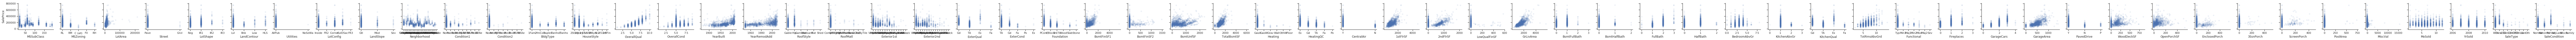

In [51]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['SalePrice', 'Id'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['SalePrice'], x_vars=x_columns, plot_kws={'alpha': 0.1, 'linewidth':0})

In [0]:
##### Your Code Here #####
# select x vars
X = df.filter(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
                '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd'])


In [94]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
X_plus = sm.add_constant(X)

model = sm.OLS(y, X_plus).fit()
predictions = model.predict(X_plus) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        05:38:19   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

Standard Error is the estimated standard deviation of a coefficient.

p-values, if less than .05, indicate the null hypothesis, which is the variables are random and not correlated, can be rejected.

Only GarageArea and TotRmsAbvGrd fail this test.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [162]:
##### Your Code Here #####
##### Your Code Here #####
# remove outliers 
X['SalePrice'] = df['SalePrice']
print(X.shape)

# drop where z score is 3 or greater
X = (X[(np.abs(stats.zscore(X)) < 3).all(axis=1)])

print(X.shape)

(1343, 11)
(1337, 11)


In [163]:
y = X['SalePrice']
X.drop('SalePrice', axis=1, inplace=True)
X_plus = sm.add_constant(X)

model = sm.OLS(y, X_plus).fit()
predictions = model.predict(X_plus) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     621.8
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        06:41:24   Log-Likelihood:                -15388.
No. Observations:                1337   AIC:                         3.080e+04
Df Residuals:                    1326   BIC:                         3.086e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.259e+06    8.6e+04    -14.634   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [164]:
##### Your Code Here #####
##### Your Code Here #####
##### Your Code Here #####
# remove outliers 
X['ln_price'] = np.log(df['SalePrice'])
print(X.shape)

# drop where z score is 3 or greater
X = (X[(np.abs(stats.zscore(X)) < 3).all(axis=1)])

print(X.shape)

(1337, 11)
(1328, 11)


In [165]:
y = X['ln_price']
X.drop('ln_price', axis=1, inplace=True)
X_plus = sm.add_constant(X)

model = sm.OLS(y, X_plus).fit()
predictions = model.predict(X_plus) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     618.6
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        06:41:50   Log-Likelihood:                 735.66
No. Observations:                1328   AIC:                            -1449.
Df Residuals:                    1317   BIC:                            -1392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8286      0.499      5.672   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [128]:
##### Your Code Here #####
X_plus = sm.add_constant(X)
for i in range(X.shape[1]):
  print(X.columns[i], '\t', variance_inflation_factor(X_plus.values, i+1))

OverallQual 	 2.748628822526028
GrLivArea 	 5.018751726960379
GarageCars 	 5.250959208922244
GarageArea 	 4.931012269274367
TotalBsmtSF 	 3.602673592046505
1stFlrSF 	 3.6847261363393753
FullBath 	 2.2154998537620036
YearBuilt 	 2.345826622279609
YearRemodAdd 	 1.751046737451263
TotRmsAbvGrd 	 3.3565172762383737


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [106]:
##### Your Code Here #####
X.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684,0.427452
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389,0.825489
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622,0.362289
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600,0.337822
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066,0.285573
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379,0.409516
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046,0.554784
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855,0.095589
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000,0.191740
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,0.095589,0.191740,1.000000


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [131]:
##### Your Code Here #####
X_plus = X.drop(['GrLivArea','GarageCars','GarageArea'], axis=1)
X_plus = sm.add_constant(X_plus)

model = sm.OLS(y, X_plus).fit()
predictions = model.predict(X_plus) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     584.6
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        06:12:23   Log-Likelihood:                -17566.
No. Observations:                1460   AIC:                         3.515e+04
Df Residuals:                    1452   BIC:                         3.519e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.222e+06   1.34e+05     -9.109   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [132]:
##### Your Code Here #####
X_plus = sm.add_constant(X)

model = sm.OLS(y, X_plus).fit(cov_type='HC3')
predictions = model.predict(X_plus) 

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     234.2
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          3.81e-294
Time:                        06:13:24   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.38e+05     -8.565   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [0]:
##### Your Code Here #####
y_var = np.log(df['SalePrice'])
fig = sns.pairplot(data=df, y_vars=y_var, x_vars=X.columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

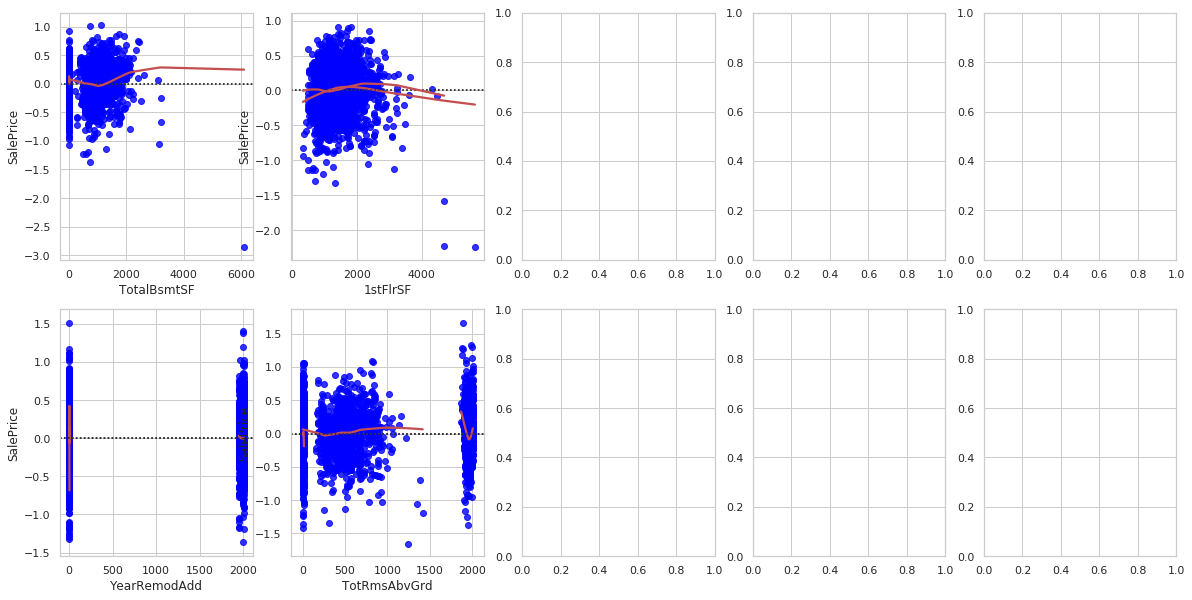

In [138]:
##### Your Code Here #####
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))

sns.residplot(X['OverallQual'], y_var, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['GrLivArea'], y_var, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['GarageCars'], y_var, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['GarageArea'], y_var, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
sns.residplot(X['TotalBsmtSF'], y_var, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(X['1stFlrSF'], y_var, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(X['FullBath'], y_var, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['YearBuilt'], y_var, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})
sns.residplot(X['YearRemodAdd'], y_var, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(X['TotRmsAbvGrd'], y_var, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})


## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other Diagnostic tests. Can you show that residuals are normally distributed graphically?
- Study for the sprint challenge!
- Write a blog post about iferential modeling using linear regression.